<a href="https://colab.research.google.com/github/gbothra38/MachineLearning/blob/main/BikeBuyers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn

In [ ]:
dataset=pd.read_csv('bike_buyers.csv')

In [ ]:
dataset[0:5]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [ ]:
len(dataset)

1000

In [ ]:
dataset.shape

(1000, 13)

In [ ]:
dataset.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

### Exploratory Data Analysis

In [ ]:
dataset.rename(columns={'Purchased Bike':'PurchasedBike'},inplace=True)

In [ ]:
dataset.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'PurchasedBike'],
      dtype='object')

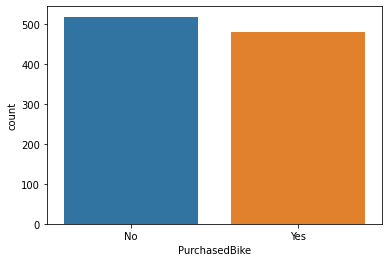

In [ ]:
seaborn.countplot(data=dataset,x='PurchasedBike')

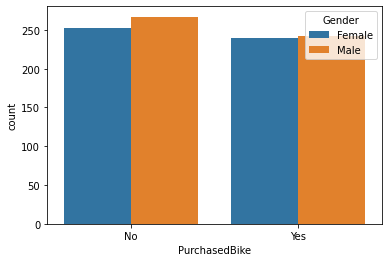

In [ ]:
seaborn.countplot(data=dataset,x='PurchasedBike',hue='Gender')

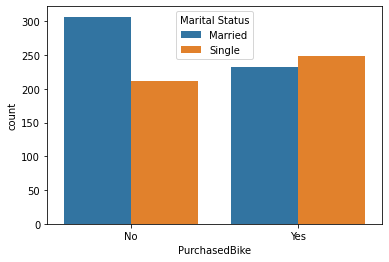

In [ ]:
seaborn.countplot(data=dataset,x='PurchasedBike',hue='Marital Status')

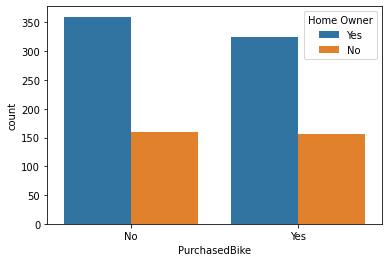

In [ ]:
seaborn.countplot(data=dataset,x='PurchasedBike',hue='Home Owner')

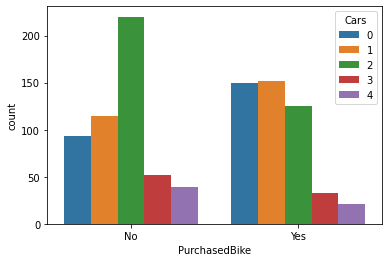

In [ ]:
seaborn.countplot(data=dataset,x='PurchasedBike',hue='Cars')

In [ ]:
dataset

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,PurchasedBike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No


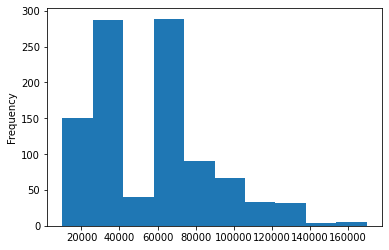

In [ ]:
dataset['Income'].plot.hist()

In [ ]:
dataset.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56140.000000,1.908000,1.452000,44.190000
std,5347.333948,31081.609779,1.626094,1.124705,11.353537
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


##Data Preprocessing/Wrangling

In [ ]:
dataset.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
PurchasedBike       0
dtype: int64

There is no null values

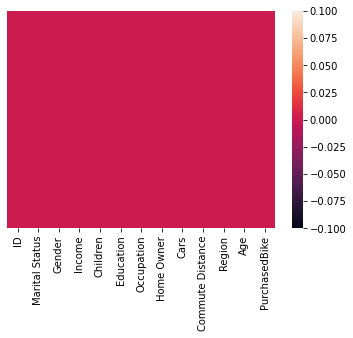

In [ ]:
seaborn.heatmap(data=dataset.isnull(),yticklabels=False)

* Drop NA  columns                               
dataset.dropna(inplace=True)

In [ ]:
dataset.drop('ID',inplace=True,axis=1)

In [ ]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [ ]:
dataset[0:5]

,Income,Children,Cars,Age,Marital Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Home Owner_Yes,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Region_North America,Region_Pacific,PurchasedBike_Yes
0,40000,1,0,42,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,30000,3,1,43,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,80000,5,2,60,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
3,70000,0,1,41,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1
4,30000,0,0,36,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


###Categorical Numerical Data

When we have categorical numerical values, we need to make them categorical and then pass it to get dummies

In [ ]:
sample_data=pd.DataFrame(np.array([0,1,2,1,0,0,1,2]))
sample_data.describe()

,0
count,8.000000
mean,0.875000
std,0.834523
min,0.000000
25%,0.000000
50%,1.000000
75%,1.250000
max,2.000000


In [ ]:
sample_data[0]=sample_data[0].map({0:'A',1:'B',2:'C'})

In [ ]:
sample_data

,0
0,A
1,B
2,C
3,B
4,A
5,A
6,B
7,C


In [ ]:
sample_data.describe()

,0
count,8
unique,3
top,A
freq,3


###Training Model

In [ ]:
dataset.rename(columns=({'PurchasedBike_Yes':'PurchasedBike'}),inplace=True)
output_dataset=dataset['PurchasedBike']
input_dataset=dataset.drop('PurchasedBike',axis=1)
# output_dataset.head()
# input_dataset.head()

In [ ]:
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
input_train,input_test,output_train,output_test=train_test_split(input_dataset,output_dataset,random_state=10,test_size=0.2,train_size=0.8)
input_train,input_validation,output_train,output_validation=train_test_split(input_train,output_train,random_state=10,test_size=0.25,train_size=0.75)
  


In [ ]:
logisticRegression=LogisticRegression()
logisticRegression.fit(input_train,output_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction=logisticRegression.predict(input_validation)

In [ ]:
print("%.3f"%np.sum(prediction==output_validation))

97.000


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(output_validation,prediction))
confusion_matrix(output_validation,prediction)

              precision    recall  f1-score   support

           0       0.50      0.69      0.58       102
           1       0.46      0.28      0.34        98

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.46       200
weighted avg       0.48      0.48      0.46       200



array([[70, 32],
       [71, 27]])

* Normalize data using z-score

In [ ]:
from sklearn.preprocessing import StandardScaler
standardScalar=StandardScaler()

In [ ]:
standard_scalar_input_train=standardScalar.fit_transform(input_train)
standard_logisticRegression=LogisticRegression()
standard_logisticRegression.fit(standard_scalar_input_train,output_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction=standard_logisticRegression.predict(input_validation)
print("%.3f"%np.sum(prediction==output_validation))

98.000


## Logistic Regression from scratch

* Define model class
* Define loss function
* Obtain optimized coefficient of model by passing training dataset

In [ ]:
import math
import tensorflow as tf

class LogisticRegression:
  def __init__(self,learning_rate=0.1,n_iters=2):
    self.learning_rate=learning_rate
    self.n_iters=n_iters
    self.weight=None
    self.bias=None

  def fit(self,X,y):
    n_samples,n_features=X.shape
    self.weight=np.zeros(n_features)
    self.bias=np.zeros(1)

    for _ in range(self.n_iters):
      linear_model=np.dot(X,self.weight)+self.bias
      predicted=self.sigmoid(linear_model)

      print(self.loss(predicted,output_train))
      #derived loss function
      dw=np.mean(np.dot(X.T,(predicted-y)))
      db=np.mean(np.sum(predicted-y))

      self.weight-=self.learning_rate*dw
      self.bias=self.learning_rate*db

  def sigmoid(self,linear_model):
    if np.all(linear_model>=0):   #Optimize sigmoid function to avoid extreme data overflow
      return 1/(1+np.exp(-linear_model))
    else:
      return np.exp(linear_model)/(1+np.exp(linear_model))

#Normal log was giving an error
  def safe_log(self,input_):
    result=np.where(input_ > 0.01,input_,1.0)
    np.log(result,out=result,where=result>0)
    return result

  def loss(self,predicted,actual):
    return np.mean(np.multiply(actual,self.safe_log(predicted))-np.multiply((1-actual),self.safe_log(1-predicted)))

  def predict(self,X):
    linear_model=np.dot(X,self.weight)+self.bias
    y_predicted=self.sigmoid(linear_model)
    y_predicted_class=[1 if i > 0.5 else 0 for i in y_predicted]
    return y_predicted_class

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn

logisticRegression=LogisticRegression()
logisticRegression.fit(input_train,output_train)
predicted_output=logisticRegression.predict(input_test)

0.03234686842613077
0.0


In [ ]:
print(len(output_test))
print("Accuracy: %.3f"%(np.sum(predicted_output==output_test)/len(output_test)))

200
Accuracy: 0.515
